<a href="https://colab.research.google.com/github/simonhosea/finalprojectdibimbing/blob/main/Final_Project_Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

Kami bertujuan untuk melengkapi hal-hal berikut untuk penelitian ini:

Identifikasi dan visualisasikan faktor mana yang berkontribusi terhadap churn pelanggan:

Bangun model prediksi yang akan melakukan hal berikut:

Mengklasifikasikan apakah pelanggan akan melakukan churn atau tidak
Lebih disukai dan berdasarkan kinerja model, pilih model yang akan melampirkan probabilitas pada churn untuk memudahkan layanan pelanggan menargetkan buah yang menggantung rendah dalam upaya mereka mencegah churn

Feature Description:

Customer ID - Unique ID given to identify a particular customer.

Credit Score - It is the score which determines the creditworthiness of a customer.

Country - The country where customer lives.

Gender - The Sex of customer.

Age - The age of customer.

Tenure - Number of years the customer has Bank Account in that Bank.

Balance - Amount of money present in customer's bank.

Products Number - Number of Products from that Bank.

Credit Card - Does the customer own a credit card of that Bank.

Active Member - Whether the customer is an active member of that Bank.

Estimated Salary - Total Income of the Customer.

Churn - Churn (Loss of existing customers) of the Bank.

# 2. Data Set review & Preparation

Pada bagian ini kita akan berusaha untuk mengeksplorasi struktur data kami:

Untuk memahami ruang input kumpulan data
Dan untuk menyiapkan set untuk tugas eksplorasi dan prediksi seperti yang dijelaskan di bagian 1

In [2]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
!pip3 install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Read the data frame
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv', delimiter=',')
df.shape

(10000, 12)

Df memiliki 1000 baris dengan 12 atribut. Kami meninjau ini lebih lanjut untuk mengidentifikasi atribut apa yang diperlukan dan manipulasi data apa yang perlu dilakukan sebelum analisis Eksplorasi dan pemodelan prediksi

In [6]:
# Check columns list and missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Yeayy ! Tidak ada Missing Values.


In [7]:
# Get unique count for each variable
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [8]:
#Drop the columns as explained above
df = df.drop(["customer_id"], axis = 1)

Variabel pertama customer_id jelas tidak memiliki pengaruh apa pun pada apakah pelanggan kemungkinan akan churn atau tidak, sehingga harus dihapus dari kumpulan data untuk menghindari munculnya gangguan yang tidak perlu pada model klasifikasi kami.

In [9]:
# Review the top rows of what is left of the data frame
df.head()


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Check variable data types
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

So we moslty have categorical variables and 5 continuous variables

# 3. Exploratory Data Analysis dan Data Visualization

Here our main interest is to get an understanding as to how the given attributes relate too the 'churn' status.

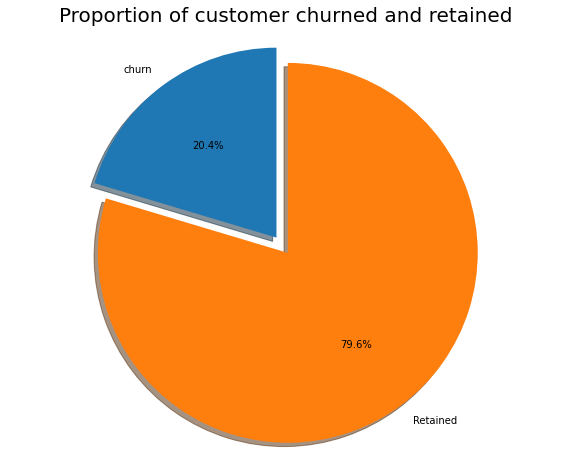

In [11]:
labels = 'churn', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

Jadi sekitar 20% dari pelanggan telah bergejolak. Jadi model dasarnya bisa memprediksi bahwa 20% pelanggan akan berhenti. Mengingat 20% adalah angka kecil, kami perlu memastikan bahwa model yang dipilih benar-benar memprediksi dengan sangat akurat 20% ini karena menarik bagi bank untuk mengidentifikasi dan mempertahankan kumpulan ini sebagai lawan memprediksi secara akurat pelanggan yang dipertahankan.

In [16]:
df.head(1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1


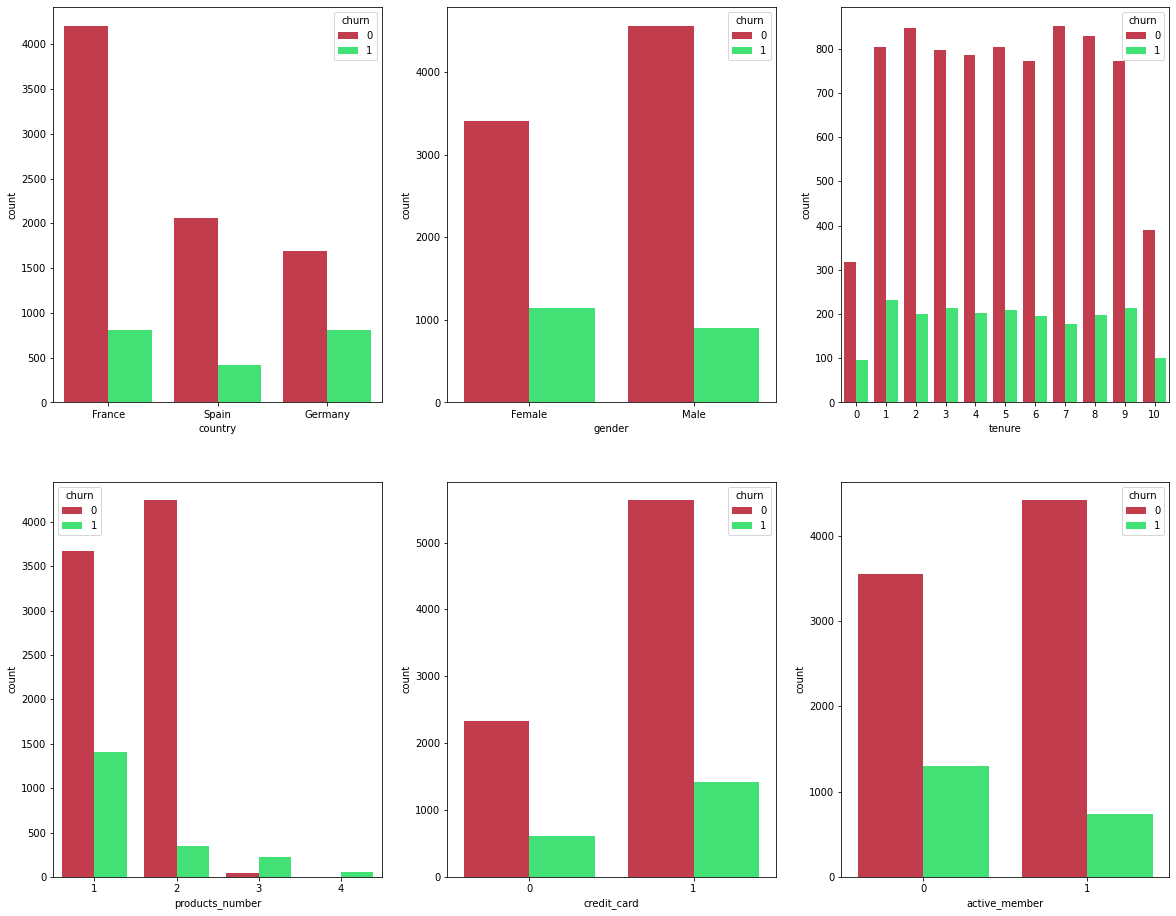

In [20]:

#Putting all the above results in a single visualization

fig_data=['country', 'gender', 'tenure','products_number', 'credit_card', 
                  'active_member']
q=1
plt.figure(figsize=(20,16))
# Plot a grid with count plots of all categorical variables
for j in fig_data:
    plt.subplot(2,3,q)
    ax=sns.countplot(df[j],hue=df.churn, palette=['#D7263D','#27FB6B'])
    plt.xlabel(j)
    q+=1
plt.show()

Kami mencatat hal-hal berikut:

Rata-rata kehilangan pelanggan tertinggi di Jerman.

Pelanggan wanita lebih sering meninggalkan bank.

Kami tidak dapat menarik kesimpulan yang tepat dari variabel Kepemilikan. Distribusinya dekat.

Teramati bahwa pelanggan yang membeli lebih dari 2 produk memiliki tingkat kerugian yang tinggi, tetapi jangan lupa bahwa data kami tidak stabil. Semua nasabah (60 orang) yang membeli 4 produk keluar dari bank.

Tingkat churn pelanggan dengan atau tanpa kartu kredit mendekati, tetapi data dalam variabel HasCrCard kami tidak stabil.
Pelanggan yang tidak aktif menggunakan bank lebih banyak meninggalkan bank.

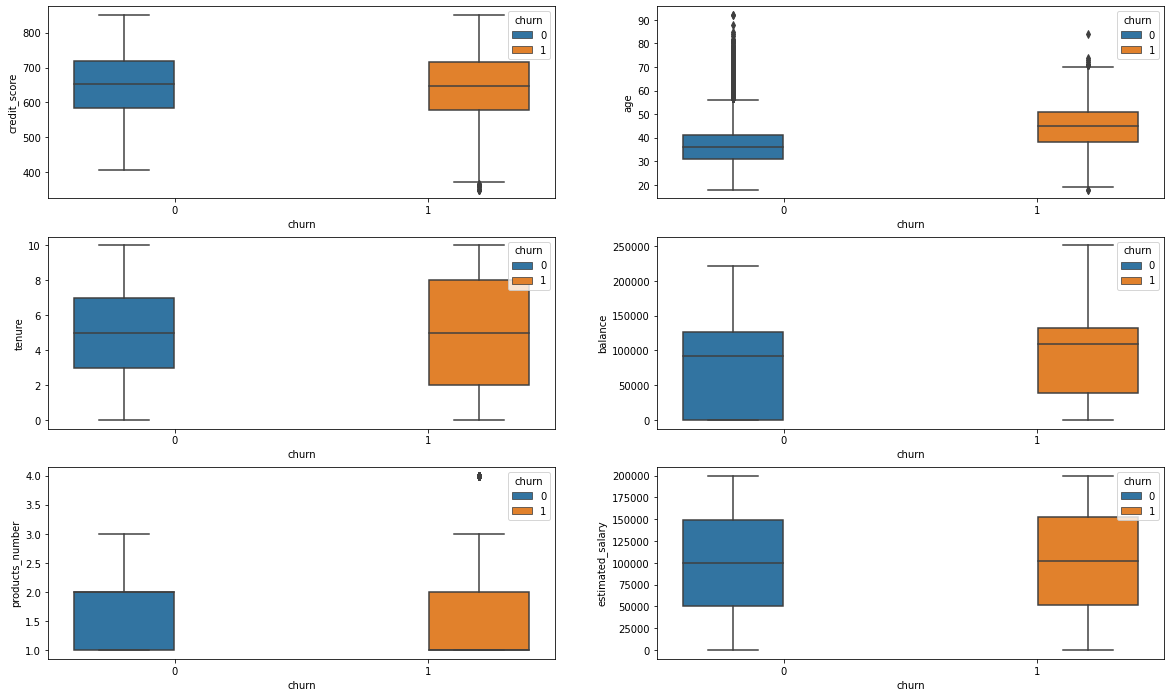

In [11]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='credit_score',x = 'churn', hue = 'churn',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = df, ax=axarr[1][1])
sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = df, ax=axarr[2][0])
sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = df, ax=axarr[2][1])

Kami mencatat hal-hal berikut:

Tidak ada perbedaan yang terlalu mencolok dalam distribusi skor kredit antara pelanggan yang dipertahankan dan pelanggan yang di-churn.

Pelanggan yang lebih tua berputar lebih banyak daripada pelanggan yang lebih muda yang menyinggung perbedaan dalam preferensi layanan dalam kategori usia. Bank mungkin perlu meninjau pasar target mereka atau meninjau strategi retensi di antara kelompok usia yang berbeda

Berkenaan dengan masa kerja, klien di kedua ujung ekstrim (menghabiskan sedikit waktu dengan bank atau banyak waktu dengan bank) lebih mungkin untuk berhenti dibandingkan dengan masa kerja rata-rata.

Yang mengkhawatirkan, bank kehilangan pelanggan dengan saldo bank yang signifikan yang kemungkinan akan mencapai modal yang tersedia untuk pinjaman.
Baik produk maupun gaji tidak berpengaruh signifikan terhadap kemungkinan terjadinya churn.

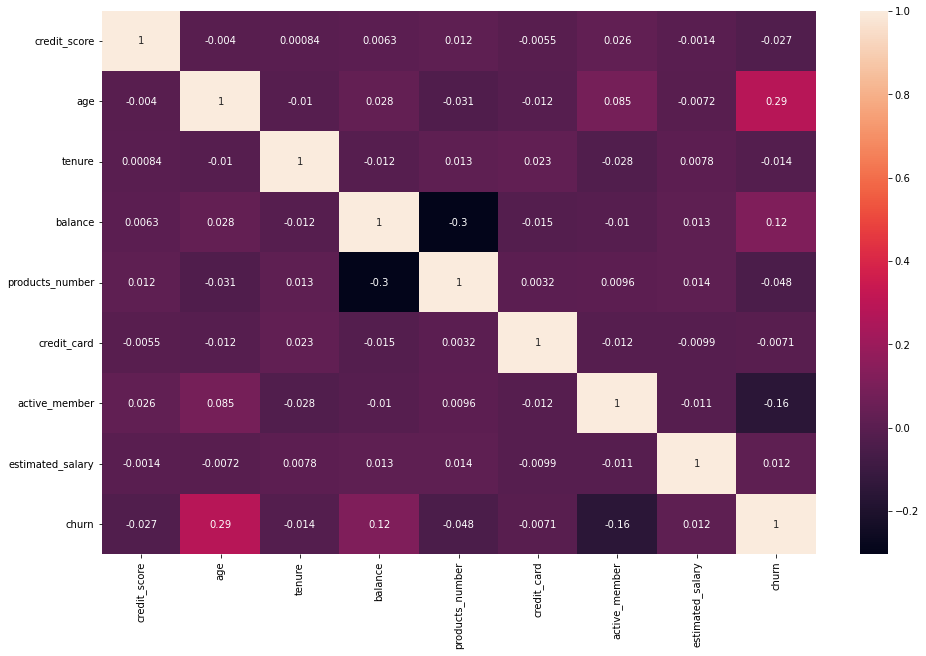

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cbar = True , annot=True)

Matriks korelasi akan membantu kita dalam mengidentifikasi ketergantungan dalam variabel. Nilai apa pun yang kurang dari 0,5 dianggap sebagai korelasi yang lemah atau tidak ada dan dari plot di atas, dapat dipastikan bahwa tidak ada variabel yang memiliki ketergantungan yang kuat.

# 4. Preprocesssing & Modelling


In [25]:
#One Hot encoding
df = pd.get_dummies(df, columns =["country", "gender"], drop_first = False)
df.head()



,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [24]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
y= df['churn']
cat_df = df[["country_Germany", "country_France","country_Spain", "gender_Male","gender_Female" ,"credit_card","active_member"]]
X= df.drop(labels=["churn","country_Germany", "country_France","country_Spain", "gender_Male","gender_Female" ,"credit_card","active_member"],axis=1)


In [30]:
cols = X.columns
index = X.index

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)
X = pd.concat([X,cat_df], axis = 1)
X.head()


,credit_score,age,tenure,balance,products_number,estimated_salary,country_Germany,country_France,country_Spain,gender_Male,gender_Female,credit_card,active_member
0,-0.25,0.42,-0.75,-0.76,0.00,0.01,0,1,0,0,1,1,1
1,-0.33,0.33,-1.00,-0.10,0.00,0.13,0,0,1,0,1,0,1
2,-1.12,0.42,0.75,0.49,2.00,0.14,0,1,0,0,1,1,0
3,0.35,0.17,-1.00,-0.76,1.00,-0.06,0,1,0,0,1,0,0
4,1.48,0.50,-0.75,0.22,0.00,-0.21,0,0,1,0,1,1,1


In [31]:
print(X.shape, y.shape)

(10000, 13) (10000,)


In [32]:

# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=10101)


In [34]:
# the usual splitting 
from sklearn.model_selection import train_test_split

X = df.drop(columns='churn').to_numpy()
y = df[['churn']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [36]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 15 s, sys: 5.87 ms, total: 15 s
Wall time: 15 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [37]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'max_depth': 5, 'n_estimators': 50}",0.27,1
23,"{'max_depth': 5, 'n_estimators': 40}",0.26,2
22,"{'max_depth': 5, 'n_estimators': 30}",0.25,3
21,"{'max_depth': 5, 'n_estimators': 20}",0.24,4
20,"{'max_depth': 5, 'n_estimators': 10}",0.24,5
16,"{'max_depth': 4, 'n_estimators': 20}",0.23,6
15,"{'max_depth': 4, 'n_estimators': 10}",0.23,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.21,8
19,"{'max_depth': 4, 'n_estimators': 50}",0.21,9
18,"{'max_depth': 4, 'n_estimators': 40}",0.21,10


Rank test nomor 1 dengan score 0.27 itu dengan kedalaman decision treenya 5 dan jumlah estimatornya 50

In [38]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 5.99 s, sys: 0 ns, total: 5.99 s
Wall time: 6.94 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='recall')

In [39]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
3,"{'n_estimators': 10, 'max_depth': 5}",0.24,1
9,"{'n_estimators': 10, 'max_depth': 4}",0.23,2
0,"{'n_estimators': 30, 'max_depth': 4}",0.21,3
5,"{'n_estimators': 50, 'max_depth': 4}",0.21,4
6,"{'n_estimators': 10, 'max_depth': 3}",0.11,5
8,"{'n_estimators': 30, 'max_depth': 2}",0.10,6
4,"{'n_estimators': 40, 'max_depth': 2}",0.09,7
1,"{'n_estimators': 40, 'max_depth': 1}",0.00,8
2,"{'n_estimators': 20, 'max_depth': 1}",0.00,8
7,"{'n_estimators': 50, 'max_depth': 1}",0.00,8


Jika menggunakan Randomized search cv , Rank test nomor 1 dengan score 0.24 itu dengan kedalaman decision treenya 5 dan jumlah estimatornya 10

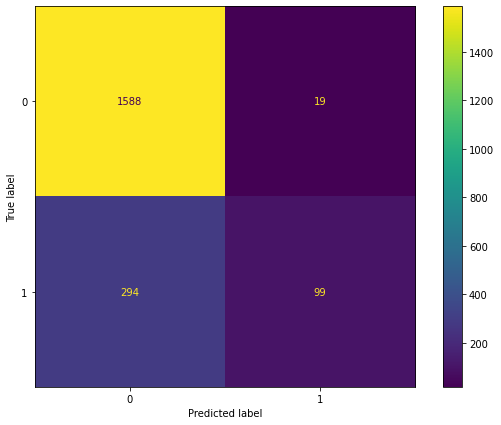

In [40]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Summary :

True Positif : 99 org diprediksi berhenti menggunakan layanan bank dan mereka benar" berhenti menggunakan layanan bank

False Positif : 19 org di prediksi berhenti menggunakan layanan bank dan ternyata prediksi salah, mereka ttp menggunakan layanan bank

False Negatif: 294 diprediksi terus menggunakan menggunakan layanan bank, tetapi prediksi salah. Mereka meninggalkan layanan bank

Tn: 1588 diprediksi terus menggunakan layanan bank dan mereka terus menggunakan layanan bank

In [42]:
#classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1607
           1       0.84      0.25      0.39       393

    accuracy                           0.84      2000
   macro avg       0.84      0.62      0.65      2000
weighted avg       0.84      0.84      0.81      2000



Precision :
Dari tes data prediksi positif, 84% yang sesungguhnya positif

Recall :
Dari semua yang sebenernya positif, yang berhasil di prediksi positif adalah 25%